In This Notebook I Used GRACE Data For Ground Water Prediction Using LSTM


####About Data
Data is Ground Water Time Series in Yemen Downloaded 

In [25]:
#Most of Code is taken from this plog
#https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
import pandas as pd
data=pd.read_csv('/content/interp.csv')

raw_seq = data.sgrace.to_list()
# Number of Steps
n_steps = 50
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# Model Definition 
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=1)


Epoch 1/200
300/300 [==============================] - 2s 5ms/step - loss: 2502.1932
Epoch 2/200
300/300 [==============================] - 0s 1ms/step - loss: 794.6748
Epoch 3/200
300/300 [==============================] - 0s 1ms/step - loss: 1288.5709
Epoch 4/200
300/300 [==============================] - 0s 1ms/step - loss: 3271.7834
Epoch 5/200
300/300 [==============================] - 0s 1ms/step - loss: 533.7824
Epoch 6/200
300/300 [==============================] - 0s 1ms/step - loss: 242.1605
Epoch 7/200
300/300 [==============================] - 0s 1ms/step - loss: 148.0981
Epoch 8/200
300/300 [==============================] - 0s 1ms/step - loss: 119.9547
Epoch 9/200
300/300 [==============================] - 0s 1ms/step - loss: 104.2324
Epoch 10/200
300/300 [==============================] - 0s 1ms/step - loss: 107.8323
Epoch 11/200
300/300 [==============================] - 0s 1ms/step - loss: 106.2812
Epoch 12/200
300/300 [==============================] - 0s 1ms/step - l

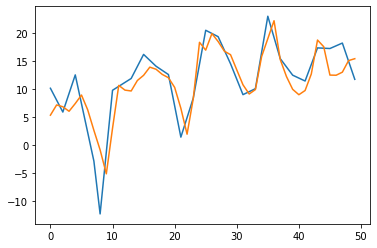

In [26]:
# Test Model on Data

x_input,yy =split_sequence(raw_seq[0:100], n_steps)
x_input = x_input.reshape((x_input.shape[0], n_steps, n_features))
yhat = model.predict(x_input, verbose=0)


import pylab
pylab.plot(yy)
pylab.plot(yhat)

In [29]:
data = raw_seq[-50:]
for i in range(300):
    dataa=data[-50:]
    dataa=array(dataa)
    dataa=dataa.reshape((1, n_steps, n_features))
    g=model.predict(dataa)
    data.append(g[0][0])

50


Model Results and prediction for Comming Years

1


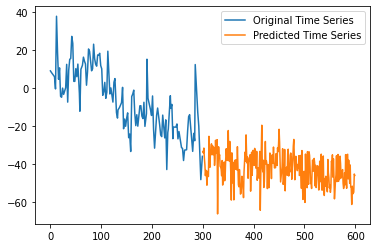

In [33]:
hole =[]
import numpy as np
hole.append(raw_seq[0:-50])
pred=[]
pred.append(np.zeros([len(hole[0])]).flatten().tolist())

pred.append(data[50:])
hole = [item for sublist in hole for item in sublist]
pred = [item for sublist in pred for item in sublist]
xh = range(len(hole))
xp = range(len(hole),len(pred))
pred = pred[len(hole):]
pylab.plot(xh,hole)
pylab.plot(xp,pred)
pylab.legend(['Original Time Series ','Predicted Time Series'])